# Part 1


We can quickly write a dynamic programming procedure in Mathematica to take care of this. Let $N$ be the number of games required to win. Let $P_N(a, b)$ be the probability of our team winning given we have won $a$ and the opponent has won $b$. The recurrence relations we need are:

$$
\begin{equation}
\begin{aligned}
P(N, b) & = 1 \quad \forall b \in [N -1] && \text{(base case 1})\\
P(a, N) & = 0 \quad \forall a \in [N - 1]&& \text{(base case 2})\\
P(a, b) & = \frac{1}{2} P(a + 1, b) + \frac{1}{2} P(a, b + 1)&& \text{(main recurrence})
\end{aligned}
\end{equation}
$$

Using the mathematica code, below

```Mathematica
Ng  = 4;
p = 1/2;
P[a_ /; a == Ng, b_] := 1;
P[a_, b_ /; b == Ng] := 0;
P[a_, b_] := P[a, b] = p P[a + 1, b] + (1 - p) P[a, b + 1];

P[1, 0]
```

We obtain $$\boxed{P_4(1, 0) = \frac{21}{32}}.$$

This is note quite the answer yet, we are asked to determine the quantity $P_4(1, 0) - P_4(0, 1)$. However, due to the symmetry of the problem, we find that

\begin{equation}
P_N(0, 1) = 1 - P_N(1, 0) \implies P_N(1, 0) - P_N(0, 1) = 2 P_N(1, 0) - 1
\end{equation}

which implies that our answer to part 1 is $$\boxed{P_4(1, 0) - P_4(0, 1) = 2P_4(1, 0) - 1  = 5 / 16}$$


# Part 2:

We now need to find the value for large but fixed $N$.

Intitially, I generated and found few values of $P_N(1, 0)$ for small $N$ shown in the table below. and noticed the denominator was always of the form $2^{2N - 2}$, which is the number of possible outcomes of the remaining games if the series were to continue to complete all $2N - 1$ games even if a team reached the nessessary number of wins. I alos

| $N$ | $P_N(1, 0)$ | Decimal Approximation |
| --- | ----------- | --------------------- |
| 1   | 1           | 1.0000                |
| 2   | 3/4         | 0.7500                |
| 3   | 11/16       | 0.6875                |
| 4 | 24/64 | 0.6563 |
| 5 | 163/256 | 0.6367 |
| 6 | 638/1024 | 0.6230 |
| 7 | 1255/2048 | 0.6128 |

I used the [OEIS](https://oeis.org/search?q=1%2C+3%2C+11%2C+42%2C+163&language=english&go=Search) to determine the numerators seem to have a nice expresssion and thus the terms might follow the pattern:

$$a(N) = \frac{1}{2^{2(N-1)}}\sum_{i = 0}^{2(N -1)} \binom{2(N - 1)}{i}$$

What is this? Well since the teams have equal probability of winning each game, all the possible sequenecs of game results are equally likely to occur. Therefore this is number of ways that our team can win divided by the total number of ways the series could play out, which is exacly what we would expect it to be and thus we have indeed that $a(N) = P_N(1,0)$.

Now, to determine what this is in the limit for large $N$, note that we can express the numerator as:

$$
\begin{equation}
\begin{aligned}
\sum_{i = 0}^{2(N -1)} \binom{2(N - 1)}{i}  &= \binom{2(N - 1)}{N - 1} + \frac{2^{2(N - 1)} - \binom{2(N - 1)}{N - 1}}{2}\\
& = \frac{\binom{2(N - 1)}{N - 1} + 2^{2(N - 1)}}{2}.
\end{aligned}
\end{equation}
$$

Furthermore, if assume $N$ is quite large, we can approximate the central binomial coeficient as $\binom{2n}{n} \approx \frac{2^{2n}}{\sqrt{\pi n}}$. Using our approximation, we can find an approximation for $P_N(1, 0)$ as

$$
\begin{equation}
\begin{aligned}
P_N(1, 0) &= \frac{\frac{1}{2} 4^{N -1} + \frac{1}{2}\binom{2(N - 1)}{N - 1}}{4^{N -1}} \\
& \approx \frac{1}{2} + \frac{1}{2} \frac{4^{N - 1}}{\sqrt{\pi (N - 1)}} \frac{1}{4^{N - 1}}\\
 & = \frac{1}{2} + \frac{1}{2 \sqrt{\pi (N - 1)}}
\end{aligned}
\end{equation}
$$

Which, then implies that $$P_N(1, 0) - P_N(0, 1) = 2 P_N(1, 0) - 1 = \boxed{\frac{1}{\sqrt{\pi (N - 1)}}} $$

If we plot this along side the numerical results, we see a very tight agreement.


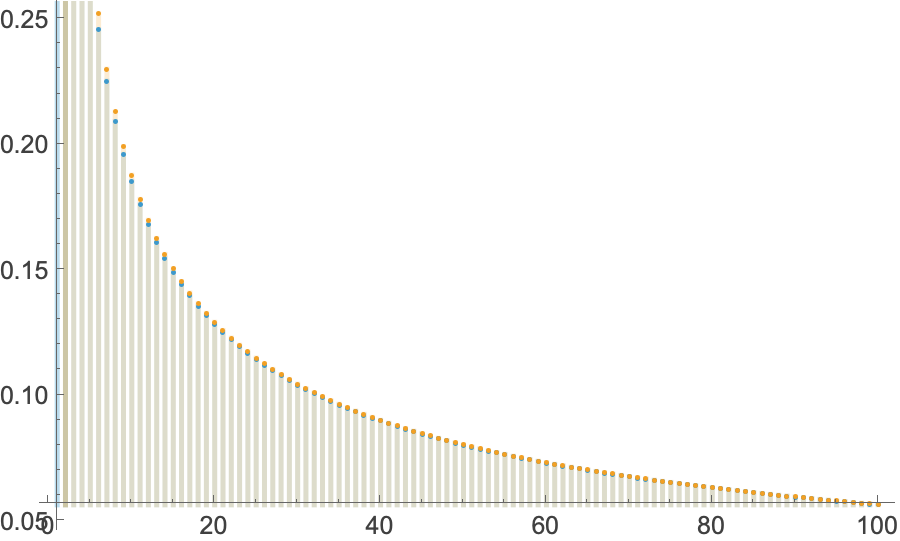